In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/taniyabanerjee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/taniyabanerjee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud


In [6]:
data_set = pd.read_csv("mbti_1 - mbti_1.csv")
data_set.head(10)

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,ENTP,I'm finding the lack of me in these posts very...
2,INTP,Good one _____ https://www.youtube.com/watc...
3,INTJ,"Dear INTP, I enjoyed our conversation the ot..."
4,ENTJ,You're fired.|||That's another silly misconcep...
5,INTJ,18/37 @.@|||Science is not perfect. No scient...
6,INFJ,"No, I can't draw on my own nails (haha). Those..."
7,INTJ,I tend to build up a collection of things on m...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,https://www.youtube.com/watch?v=w8-egj0y8Qs|||...


In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


*No null value present in the dataset*

### DATA PRE-PROCESSING

In [8]:
data_set.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

<Axes: xlabel='count', ylabel='type'>

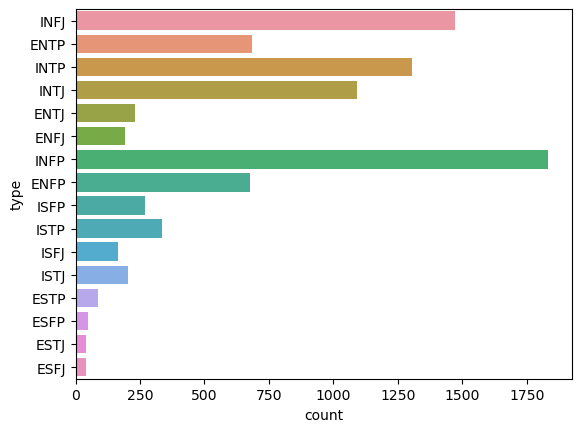

In [9]:
sns.countplot(data= data_set, y= 'type')

In [10]:
data_set.posts[0]


"http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

<b> From above we can see that we need to clean the text. </b>

In [11]:
lemmatizer = WordNetLemmatizer()
useless_words = stopwords.words("english")
# unique_type_list = [x.lower() for x in ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
#                                         'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']]

def pre_process_sentence(sentence):
    words_number = []
    # Remove URL links
    sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    # Remove non-words and excess spaces
    sentence = re.sub(r'[^a-zA-Z]+', ' ', sentence).lower()
    # Remove repeating letters
    sentence = re.sub(r'([a-z])\1{2,}', '', sentence)
    # Tokenize, remove stop words, and lemmatize
    words = sentence.split()
    words = [word for word in words if word not in useless_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    sentence = ' '.join(words)
    # Remove MBTI personality words if required
#     if remove_mbti_profiles:
#         sentence = re.sub(r'\b(?:' + '|'.join(unique_type_list) + r')\b', '', sentence)

    return sentence

In [12]:
# data_set['posts'] = data_set['posts'].apply(pre_process_sentence)
# Clean text
data_set.posts = data_set['posts'].apply(pre_process_sentence)



In [13]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/taniyabanerjee/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
from sklearn.preprocessing import LabelEncoder

target_encoder=LabelEncoder()
data_set['type_encoded']=target_encoder.fit_transform(data_set['type'])
target_encoder.classes_


array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

### Separate dependent and independent features


In [15]:
X = data_set['posts']
Y = data_set['type_encoded']

### Split into training test data


In [16]:
from sklearn.model_selection import train_test_split

x_test, x_train, y_test, y_train = train_test_split(X,Y, train_size=0.7, random_state=42,stratify=data_set.type)
# # Stratify split to ensure equal distribution of data

# train_data,test_data=train_test_split(data,test_size=0.2,random_state=42,stratify=data.type)

In [25]:
def output_status():
    for x in range(16):
        if type_encoded == 0:
            return "ENFJ"
    elif type_encoded == 1:
        return"ENFP"
    elif type_encoded == 2:
        return"ENTJ"
    elif type_encoded == 3:
        return"ENTP"
    elif type_encoded == 4:
        return"ESFJ"
    elif type_encoded == 5:
        return"ESFP"
    elif type_encoded == 6:
        return"ESTJ"
    elif type_encoded == 7:
        return"ESTP"
    elif type_encoded == 8:
        return"INFJ"
    elif type_encoded == 9:
        return"INFP"
    elif type_encoded == 10:
        return"INTJ"
    elif type_encoded == 11:
        return"INTP"
    elif type_encoded == 12:
        return"ISFJ"
    elif type_encoded == 13:
        return"ISFP"
    elif type_encoded == 14:
        return"ISTJ"
    elif type_encoded == 15:
        return"ISTP"

In [26]:
px.pie(y_train,names=output_status(type_encoded),title='Personality type',hole=0.3)


NameError: name 'type_encoded' is not defined

In [ ]:
px.pie(y_test,names='type',title='Personality type',hole=0.3)


In [ ]:
# The distribution for test and train data sets are equal. 

### Tokenizing vector 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer(stop_words='english')

xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test) 

In [ ]:
feature_names = vectorization.get_feature_names_out()
wc = WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)

### Train model

In [ ]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"score {model.score(xv_test, y_test)}")
    print(f"classification report \n {classification_report(y_test, y_pred)}")


In [ ]:
from sklearn.preprocessing import LabelEncoder

target_encoder=LabelEncoder()
y_train=target_encoder.fit_transform(y_train)
y_test=target_encoder.transform(y_test)

print(target_encoder.classes_)


In [ ]:
# LogisticRegression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
train_model(lr, xv_train, xv_test, y_train, y_test)

In [ ]:
# Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
train_model(dtc, xv_train, xv_test, y_train, y_test)

In [ ]:
# Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 
train_model(rfc, xv_train, xv_test, y_train, y_test)

In [ ]:
# Linear Support vector 

from sklearn.svm import SVC,LinearSVC
lsvc = LinearSVC()
train_model(lsvc, xv_train, xv_test, y_train, y_test)

In [ ]:
# Support vector 

svc = SVC()
train_model(svc, xv_train, xv_test, y_train, y_test)

In [ ]:
# XGBoost Classifier

from xgboost import XGBClassifier

xgb=XGBClassifier()
train_model(xgb, xv_train, xv_test, y_train, y_test)

In [ ]:
# Gradient Boost

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
train_model(gbc, xv_train, xv_test, y_train, y_test)

In [ ]:
pip install catboost

In [ ]:
#CatBoostClassifier

from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
train_model(cbc, xv_train, xv_test, y_train, y_test)



### Manual testing

In [23]:
data_check_encoding = data_set.drop_duplicates('type')
data_check_encoding

,type,posts,type_encoded
0,INFJ,intj moment sportscenter top ten play prank li...,8
1,ENTP,finding lack post alarming sex boring position...,3
2,INTP,good one course say know blessing curse absolu...,11
3,INTJ,dear intp enjoyed conversation day esoteric ga...,10
4,ENTJ,fired another silly misconception approaching ...,2
11,ENFJ,went break month ago together year planned lif...,0
17,INFP,think agree personally consider alpha beta fox...,9
26,ENFP,want go trip without staying behind option thi...,1
27,ISFP,paint without number guess istp best bud esfp ...,13
40,ISTP,got read enneagram though read somewhere lot m...,15


In [ ]:
def output_status(type_encoded):
    if type_encoded == 0:
        return "ENFJ"
    elif type_encoded == 1:
        return"ENFP"
    elif type_encoded == 2:
        return"ENTJ"
    elif type_encoded == 3:
        return"ENTP"
    elif type_encoded == 4:
        return"ESFJ"
    elif type_encoded == 5:
        return"ESFP"
    elif type_encoded == 6:
        return"ESTJ"
    elif type_encoded == 7:
        return"ESTP"
    elif type_encoded == 8:
        return"INFJ"
    elif type_encoded == 9:
        return"INFP"
    elif type_encoded == 10:
        return"INTJ"
    elif type_encoded == 11:
        return"INTP"
    elif type_encoded == 12:
        return"ISFJ"
    elif type_encoded == 13:
        return"ISFP"
    elif type_encoded == 14:
        return"ISTJ"
    elif type_encoded == 15:
        return"ISTP"
        
def manual_testing(comments):
    testing_comments = {"text": [comments]} #dictonary 
    df_test = pd.DataFrame(testing_comments)
    df_test['text'] = df_test['text'].apply(pre_process_sentence)
    new_x_test = df_test['text']
    new_xv_test = vectorization.transform(new_x_test) #object vectorization is defined above_ tfidf
    y_pred_lr = lr.predict(new_xv_test)
    y_pred_dtc = dtc.predict(new_xv_test)
    y_pred_rfc = rfc.predict(new_xv_test)
    y_pred_lsvc = lsvc.predict(new_xv_test)
    y_pred_svc = svc.predict(new_xv_test)
    y_pred_xgb = xgb.predict(new_xv_test)
    y_pred_gbc = gbc.predict(new_xv_test)
#     y_pred_cbc = cbc.predict(new_xv_test)
    return print('''prediction  \n\nLogistic Regression {}, 
                    \nDecision tree {},
                  \nRandom forest {}, 
                  \nLinear Support vector {}, 
                  \nSupport vector {},
                  \nXGBoost classifier{},
                  \nGradient Boost {}''' .format(output_status(y_pred_lr[0]), 
                         output_status(y_pred_dtc[0]), 
                         output_status(y_pred_rfc[0]), 
                         output_status(y_pred_lsvc[0]),
                         output_status(y_pred_svc[0]),
                         output_status(y_pred_xgb[0]),
                         output_status(y_pred_gbc[0])))

In [ ]:
comment = "My treat of the day!  I recognise some interesting movement of my cravings towards meat these days - more specifically in the form of Köfte most recently. 🤤 I rode my bike to the restaurant for the pickup and as soon as I held this beauty in my hand it was obvious that this sandwich would never make it all the way home with me. I wanted the fresh taste when it was still nice and warm and I could not wait until I was home. With such lovely creations in my hands cold (or darkness) do not matter anymore. 😁And with the first bite I forgot everything else around me as well fully focusing on the amazing juicy, falling-apart-tender meat that seduced my tongue… 👌🏼 I was absolutely in my happy place! Thanks guys for making this happen! Because for me food alone is great but what makes it really outstanding are the people behind it, I wanted to leave a shoutout to the guys at the eatery because I exchanged a few messages with them on IG and I had a quick chat with one person when I picked up the sandwich. Absolutely lovely people! I am majorly excited for your next creation and am majorly happy that I was able to get my hands on this sandwich before its off the menu."


In [ ]:
manual_testing(comment)